<img src="https://cdn-3.expansion.mx/dims4/default/47e01bc/2147483647/strip/true/crop/705x495+0+0/resize/1800x1264!/format/webp/quality/80/?url=https%3A%2F%2Fcdn-3.expansion.mx%2Ff8%2F70%2F05f64f064673ba2f5a375e098154%2Fistock-865305736.jpg" width="350px">

## Contexto

Este archivo de conjunto de datos, titulado "Global Crude Petroleum Trade 1995-2021.csv" presenta un registro completo de las transacciones comerciales mundiales de petróleo crudo que abarcan un período de dos décadas, de 1995 a 2021. Proporciona información detallada sobre las actividades de importación y exportación de los países en todo el mundo, ofreciendo un valioso recurso para un análisis en profundidad del mercado internacional del petróleo crudo.

### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import warnings

## Dataset

In [3]:
# Cargar el conjunto de datos para examinar su estructura
file_path = 'https://raw.githubusercontent.com/ricss125/Cert_Business_Intelligence/main/Dataset/Global%20Crude%20Petroleum%20Trade%201995-2021.csv'
oil_data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para entender su estructura
oil_data.head()

,Continent,Country,Trade Value,Year,Action
0,Africa,Angola,2.767000e+10,2021,Export
1,Africa,Botswana,2.055000e+03,2021,Export
2,Africa,Cote d'Ivoire,4.447282e+08,2021,Export
3,Africa,Cameroon,1.865465e+09,2021,Export
4,Africa,Democratic Republic of the Congo,5.815086e+08,2021,Export


## Precio de Petróleo por Continente

In [4]:
# Agrupar el DataFrame 'oil_data' por 'Año' y 'Continente', calcula la media del 'Valor del Comercio' para cada grupo,
# y reorganiza los datos para que cada continente se convierta en una columna (usando unstack).
grouped_oil_data = oil_data.groupby(['Year', 'Continent'])['Trade Value'].mean().unstack()

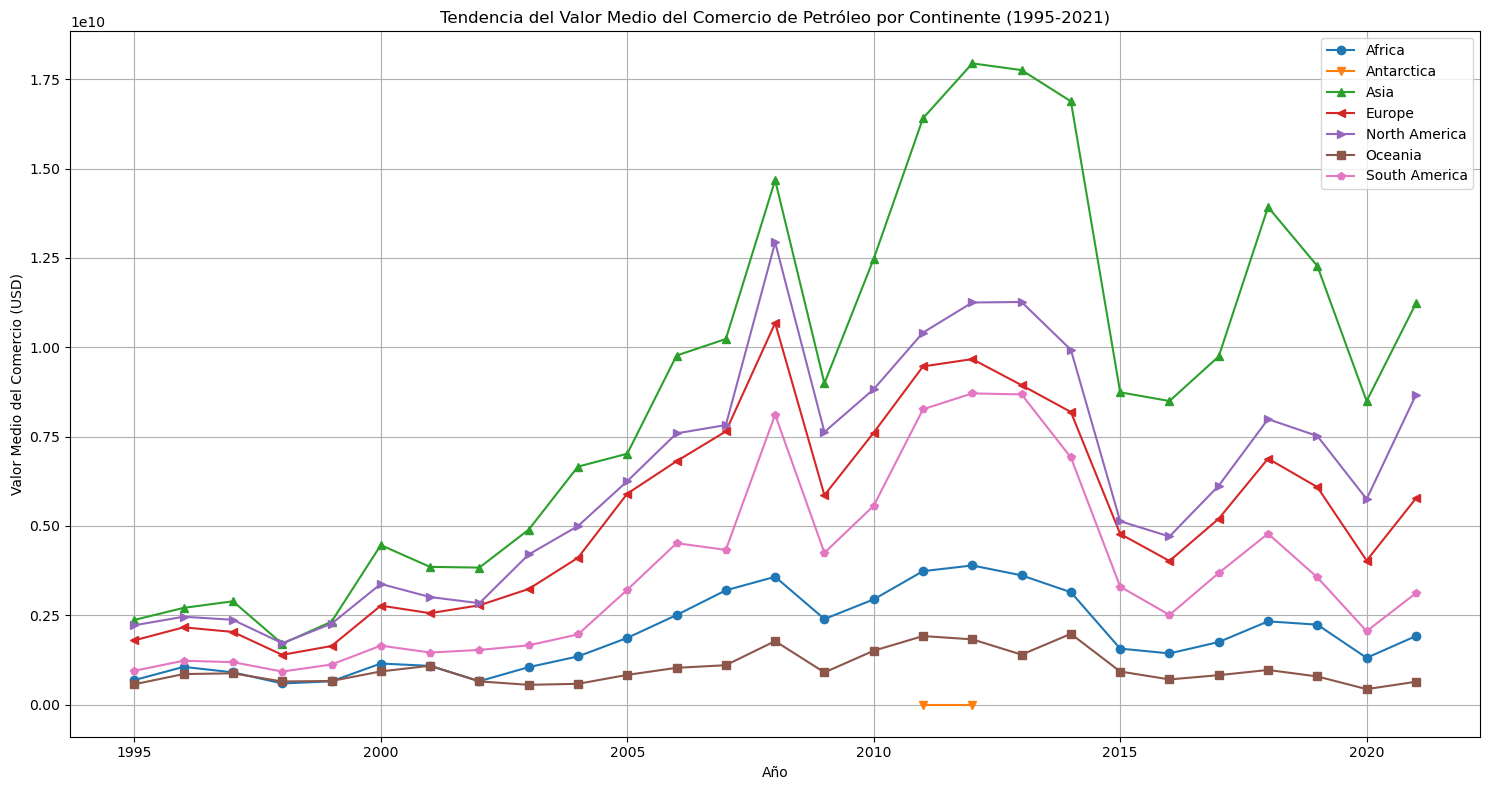

In [5]:
# Preparación para graficar los datos. Establecer el tamaño de la figura a 15 pulgadas de ancho
# y 8 pulgadas de alto para mejorar la claridad.
plt.figure(figsize=(15, 8))

# Define una lista de diferentes símbolos de marcadores para distinguir visualmente cada continente en la gráfica.
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', '+', 'x']

# Se Iterara sobre cada continente en los datos agrupados. Para cada continente, traza su valor medio anual de comercio
# contra el año. Utiliza un marcador único de la lista de marcadores para cada continente. La selección del marcador
# se cicla a través de la lista usando la operación módulo con la longitud de la lista de marcadores.
for i, (continent, data) in enumerate(grouped_oil_data.items()):
    plt.plot(data.index, data.values, label=continent, marker=markers[i % len(markers)])
    
# Establecer el título de la gráfica a 'Tendencia del Valor Medio del Comercio de Petróleo por Continente (1995-2021)'.
plt.title('Tendencia del Valor Medio del Comercio de Petróleo por Continente (1995-2021)')
# Etiquetar el eje x como 'Año' y el eje y como 'Valor Medio del Comercio (USD)'.
plt.xlabel('Año')
plt.ylabel('Valor Medio del Comercio (USD)')
# Añade una leyenda a la gráfica para identificar la serie de datos de cada continente.
plt.legend()
# Muestra una cuadrícula en la gráfica para mejorar la legibilidad.
plt.grid(True)
# Ajusta el diseño de la gráfica para asegurarse de que elementos como etiquetas y títulos encajen bien sin superponerse.
plt.tight_layout()
# Muestra la gráfica final.
plt.show()

## País con al menos 15 años de datos estables

In [6]:
# Seleccionando un país con al menos 15 años de datos estables
# Consideraremos 'estable' como tener datos durante al menos 15 años sin grandes brechas

# Contando el número de años de datos disponibles para cada país
# Agrupar el DataFrame 'oil_data' por 'País', contar el número de entradas para cada país y seleccionar la columna 'Año'
country_data_counts = oil_data.groupby('Country').count()['Year']

# Filtrando países con al menos 15 años de datos
# Filtrar los países donde el conteo de años de datos es mayor o igual a 15
countries_with_stable_data = country_data_counts[country_data_counts >= 15].index.tolist()

# Mostrando la lista de países con datos estables
# Mostrar los primeros 10 países de la lista de países con datos estables por brevedad
countries_with_stable_data[:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria']

### Regresión Lineal

In [7]:
# Preparación de datos para Argelia
# Filtrando el DataFrame 'oil_data' para las filas donde la columna 'País' es 'Argelia'
algeria_data = oil_data[oil_data['Country'] == 'Algeria']

# Agrupando los datos filtrados por 'Año', calculando la media del 'Valor del Comercio' para cada año y reiniciando el índice
algeria_data_grouped = algeria_data.groupby('Year').agg({'Trade Value': 'mean'}).reset_index()

# Preparando datos para la regresión lineal
# Extrayendo 'Año' como variable predictora y cambiándola de forma para ajustarse a los requisitos del modelo
X = algeria_data_grouped['Year'].values.reshape(-1, 1)

# Extrayendo 'Valor del Comercio' como variable de respuesta
y = algeria_data_grouped['Trade Value'].values

# Entrenamiento del Modelo
# Creando una instancia del modelo LinearRegression
lin_reg = LinearRegression()

# Ajustando el modelo de regresión lineal con los datos preparados
lin_reg.fit(X, y)

LinearRegression()

In [8]:
# Pronóstico para los próximos 5 años (2022-2026)
# Creando un arreglo de los próximos 5 años y cambiándolo de forma para la predicción
forecast_years = np.array([year for year in range(2022, 2027)]).reshape(-1, 1)

# Usando el modelo entrenado para predecir el 'Valor del Comercio' para los años de pronóstico
forecast_values = lin_reg.predict(forecast_years)

# Añadiendo datos de pronóstico al dataframe para la visualización
# Creando un nuevo DataFrame con los años y valores pronosticados, y categorizándolos como 'Pronóstico'
forecast_df = pd.DataFrame({'Year': forecast_years.flatten(), 'Trade Value': forecast_values, 'Type': 'Forecast'})

# Concatenando los datos históricos y de pronóstico para fines de visualización
plot_data = pd.concat([algeria_data_grouped.assign(Type='Historical'), forecast_df])

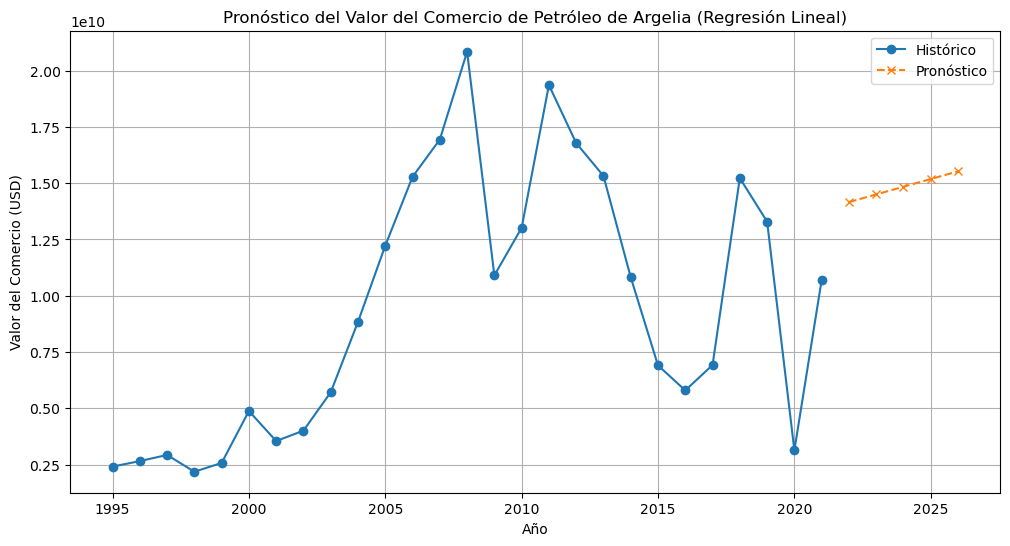

In [9]:
# Visualización
# Creando una nueva figura para graficar con un tamaño especificado
plt.figure(figsize=(12, 6))

# Graficando los puntos de datos históricos. Seleccionando 'Año' y 'Valor del Comercio' de 'plot_data' donde
# 'Tipo' es 'Histórico', y usando círculos como marcadores
plt.plot(plot_data[plot_data['Type'] == 'Historical']['Year'], plot_data[plot_data['Type'] == 'Historical']['Trade Value'], 
         label='Histórico', marker='o')

# Graficando los puntos de datos pronosticados. Seleccionando 'Año' y 'Valor del Comercio' de 'plot_data' donde
# 'Tipo' es 'Pronóstico', usando 'x' como marcadores y líneas punteadas para el estilo
plt.plot(plot_data[plot_data['Type'] == 'Forecast']['Year'], plot_data[plot_data['Type'] == 'Forecast']['Trade Value'], 
         label='Pronóstico', marker='x', linestyle='--')

# Estableciendo el título de la gráfica
plt.title('Pronóstico del Valor del Comercio de Petróleo de Argelia (Regresión Lineal)')
# Etiquetando el eje x como 'Año' y el eje y como 'Valor del Comercio (USD)'
plt.xlabel('Año')
plt.ylabel('Valor del Comercio (USD)')
# Añadiendo una leyenda a la gráfica
plt.legend()
# Mostrando una cuadrícula para una mejor legibilidad
plt.grid(True)
# Mostrando la gráfica
plt.show()
# Coeficientes del modelo
# Extrayendo la pendiente y la intersección del modelo de regresión lineal
lin_reg_slope, lin_reg_intercept = lin_reg.coef_[0], lin_reg.intercept_

### Modelo de Series de Tiempo

In [10]:
# Pronóstico de Modelo de Series Temporales: ARIMA

# ARIMA requiere una serie temporal estacionaria. Primero verificaremos si la serie es estacionaria.
from statsmodels.tsa.stattools import adfuller

# Realizando la prueba de Dickey-Fuller aumentada para verificar la estacionariedad
adf_test = adfuller(algeria_data_grouped['Trade Value'])

# Entrenamiento y Pronóstico del Modelo ARIMA
# Ignorando advertencias de convergencia por simplicidad en este ejercicio
warnings.filterwarnings("ignore")

# Encontrando el orden del modelo ARIMA
# Usaremos un enfoque común de probar diferentes combinaciones de p, d, q y seleccionar la que tenga
# el mejor AIC (Criterio de Información de Akaike)
import itertools

# Definiendo rangos para los parámetros p, d, q
p = d = q = range(0, 3)

# Generando todas las combinaciones posibles de p, d, q
pdq_combinations = list(itertools.product(p, d, q))

In [11]:
# Inicializando el mejor AIC a infinito y el mejor orden a Ninguno
best_aic = float("inf")
best_order = None

# Iterando sobre todas las combinaciones para encontrar el mejor valor de AIC
for combination in pdq_combinations:
    try:
        # Creando un modelo ARIMA con la combinación actual
        model = ARIMA(algeria_data_grouped['Trade Value'], order=combination)
        # Ajustando el modelo
        model_fit = model.fit()
        # Actualizando el mejor AIC y orden si el AIC del modelo actual es menor
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = combination
    except:
        continue

# Ajustando el modelo ARIMA con el mejor orden encontrado
arima_model = ARIMA(algeria_data_grouped['Trade Value'], order=best_order)
arima_model_fit = arima_model.fit()

# Pronosticando para los próximos 5 años (2022-2026)
arima_forecast = arima_model_fit.forecast(steps=5)

# Añadiendo datos de pronóstico al dataframe para la visualización
arima_forecast_df = pd.DataFrame({'Year': range(2022, 2027), 'Trade Value': arima_forecast, 'Type': 'Forecast'})
arima_plot_data = pd.concat([algeria_data_grouped.assign(Type='Historical'), arima_forecast_df])

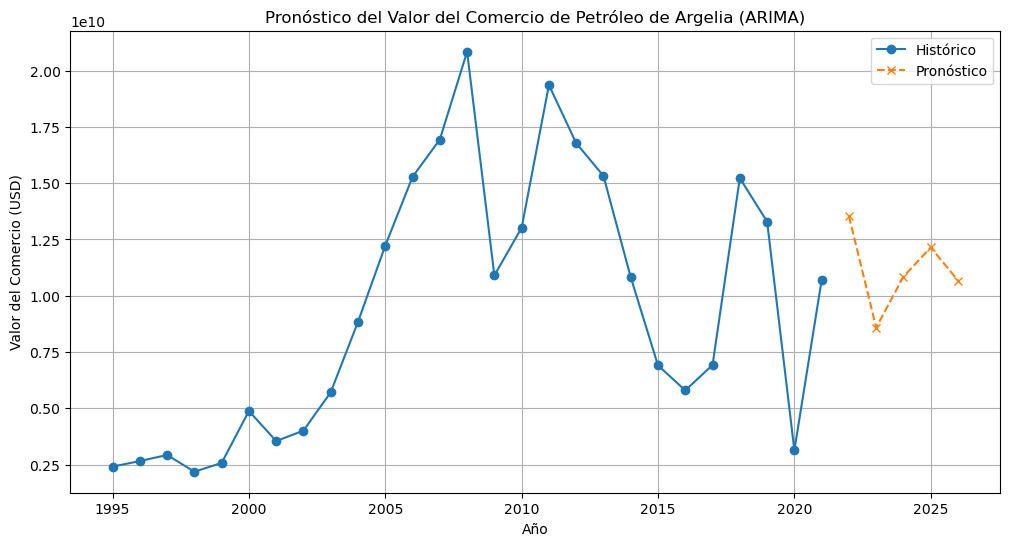

((2, 2, 2), 1189.2253030440916, -2.184444620693247, 0.2119395237228225)

In [12]:
# Visualización
# Creando una nueva figura para graficar
plt.figure(figsize=(12, 6))
# Graficando datos históricos
plt.plot(arima_plot_data[arima_plot_data['Type'] == 'Historical']['Year'], 
         arima_plot_data[arima_plot_data['Type'] == 'Historical']['Trade Value'], label='Histórico', marker='o')
# Graficando datos pronosticados
plt.plot(arima_plot_data[arima_plot_data['Type'] == 'Forecast']['Year'], 
         arima_plot_data[arima_plot_data['Type'] == 'Forecast']['Trade Value'], label='Pronóstico', marker='x', linestyle='--')
# Estableciendo el título y las etiquetas de la gráfica
plt.title('Pronóstico del Valor del Comercio de Petróleo de Argelia (ARIMA)')
plt.xlabel('Año')
plt.ylabel('Valor del Comercio (USD)')
# Añadiendo una leyenda y cuadrícula
plt.legend()
plt.grid(True)
# Mostrando la gráfica
plt.show()

# Mostrando el mejor orden y AIC de ARIMA, y los resultados de la prueba ADF
best_order, best_aic, adf_test[0], adf_test[1]

## Precios Mínimos y Máximos de Petróleo (Valores de Comercio) por Continente

In [13]:
# Precios Mínimos y Máximos de Petróleo (Valores de Comercio) por Continente

# Calculando el valor medio del comercio por continente para cada año
# Agrupar el DataFrame 'oil_data' por 'Continente' y 'Año', luego agregar usando la media de 'Valor del Comercio',
# y reiniciar el índice
continent_avg_values = oil_data.groupby(['Continent', 'Year']).agg({'Trade Value': 'mean'}).reset_index()

# Encontrando los valores medios de comercio mínimos y máximos para cada continente
# Agrupar por 'Continente' y encontrar el 'Valor del Comercio' mínimo para cada continente
min_values_by_continent = continent_avg_values.groupby('Continent')['Trade Value'].min()

# Agrupar por 'Continente' y encontrar el 'Valor del Comercio' máximo para cada continente
max_values_by_continent = continent_avg_values.groupby('Continent')['Trade Value'].max()

# Creando un DataFrame para mostrar los valores mínimos y máximos de comercio por continente
# Combinar los valores mínimos y máximos en un nuevo DataFrame con 'Continente' como índice
min_max_values_by_continent = pd.DataFrame({
    'Valor de Comercio Mínimo': min_values_by_continent,
    'Valor de Comercio Máximo': max_values_by_continent
}).reset_index()

# Mostrando el DataFrame que contiene los valores mínimos y máximos
min_max_values_by_continent

,Continent,Valor de Comercio Mínimo,Valor de Comercio Máximo
0,Africa,5.928493e+08,3.895386e+09
1,Antarctica,2.060000e+02,3.560000e+02
2,Asia,1.703323e+09,1.794578e+10
3,Europe,1.394245e+09,1.067925e+10
4,North America,1.720591e+09,1.293500e+10
5,Oceania,4.344617e+08,1.982009e+09
6,South America,9.263762e+08,8.710744e+09


In [14]:
# Identificando el País con el Mejor Precio de Venta en los Últimos 5 Años

# Filtrando datos para los últimos 5 años (2017-2021)
# Seleccionando filas de 'oil_data' donde el 'Año' sea mayor o igual a 2017
recent_data = oil_data[oil_data['Year'] >= 2017]

# Calculando el valor medio de comercio por país durante este período
# Agrupando los datos recientes por 'País', agregando para encontrar el 'Valor de Comercio' medio, y reiniciando el índice
country_avg_values_recent = recent_data.groupby('Country').agg({'Trade Value': 'mean'}).reset_index()

# Encontrando el país con el valor medio de comercio más alto
# Ordenando los países por 'Valor de Comercio' en orden descendente y seleccionando el país superior
country_with_best_selling_price = country_avg_values_recent.sort_values(by='Trade Value', ascending=False).head(1)

# Mostrando el país con el mejor precio de venta
country_with_best_selling_price

,Country,Trade Value
42,China,9.110163e+10


## Precios promedios de exportación e importación por año

In [15]:
# Preparación de Datos

# Separando el conjunto de datos en exportaciones e importaciones
# Filtrando 'oil_data' para las filas donde 'Acción' es 'Exportación'
exports_data = oil_data[oil_data['Action'] == 'Export']

# Filtrando 'oil_data' para las filas donde 'Acción' es 'Importación'
imports_data = oil_data[oil_data['Action'] == 'Import']

# Calculando el valor medio de comercio para exportaciones e importaciones por año
# Agrupando los datos de exportaciones por 'Año', calculando la media de 'Valor de Comercio', y reiniciando el índice
avg_exports_by_year = exports_data.groupby('Year').agg({'Trade Value': 'mean'}).reset_index()

# Agrupando los datos de importaciones por 'Año', calculando la media de 'Valor de Comercio', y reiniciando el índice
avg_imports_by_year = imports_data.groupby('Year').agg({'Trade Value': 'mean'}).reset_index()

# Fusionando los dos conjuntos de datos para una comparación más fácil
# Fusionando los datos promedio de exportaciones e importaciones en 'Año', con sufijos para distinción
comparison_data = avg_exports_by_year.merge(avg_imports_by_year, on='Year', suffixes=('_Export', '_Import'))

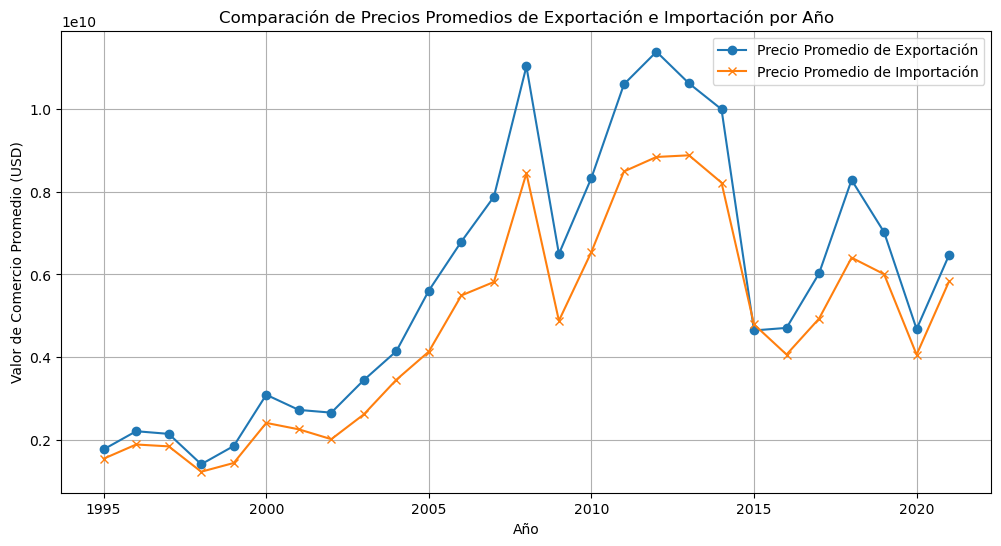

In [20]:
# Visualización: Gráfico de Líneas
# Creando una figura para graficar con un tamaño específico
plt.figure(figsize=(12, 6))

# Graficando el precio medio de exportación por año con círculos como marcadores
plt.plot(comparison_data['Year'], comparison_data['Trade Value_Export'], label='Precio Promedio de Exportación', marker='o')

# Graficando el precio medio de importación por año con 'x' como marcadores
plt.plot(comparison_data['Year'], comparison_data['Trade Value_Import'], label='Precio Promedio de Importación', marker='x')

# Estableciendo el título y etiquetando los ejes
plt.title('Comparación de Precios Promedios de Exportación e Importación por Año')
plt.xlabel('Año')
plt.ylabel('Valor de Comercio Promedio (USD)')

# Añadiendo una leyenda y activando la cuadrícula para una mejor legibilidad
plt.legend()
plt.grid(True)

# Mostrando el gráfico
plt.show()

In [17]:
# Mostrando las primeras filas del conjunto de datos fusionado para una vista rápida
comparison_data.head()

,Year,Trade Value_Export,Trade Value_Import
0,1995,1.771953e+09,1.546705e+09
1,1996,2.210221e+09,1.889382e+09
2,1997,2.146065e+09,1.844275e+09
3,1998,1.411846e+09,1.231384e+09
4,1999,1.853032e+09,1.442629e+09


## Análisis Cuantitativo: Pronóstico de Regresión Lineal para la Tendencia de Exportación

In [18]:
# Análisis Cuantitativo: Pronóstico de Regresión Lineal para la Tendencia de Exportación

# Preparando datos para la regresión lineal
# Extrayendo 'Año' como variable predictora y cambiándola de forma para ajustarse a los requisitos de la regresión lineal
X_exports = avg_exports_by_year['Year'].values.reshape(-1, 1)  # Predictora (Año)

# Extrayendo 'Valor del Comercio' como variable de respuesta (Precio Medio de Exportación)
y_exports = avg_exports_by_year['Trade Value'].values  # Respuesta (Precio Medio de Exportación)

# Entrenamiento del Modelo
# Creando una instancia del modelo LinearRegression
lin_reg_exports = LinearRegression()

# Ajustando el modelo de regresión lineal con los datos de exportación
lin_reg_exports.fit(X_exports, y_exports)

# Pronóstico para los próximos 2 años (2022 y 2023)
# Creando un arreglo para los próximos 2 años y cambiándolo de forma para la predicción
forecast_years_exports = np.array([2022, 2023]).reshape(-1, 1)

# Usando el modelo entrenado para predecir el 'Valor del Comercio' para los años pronosticados
forecast_values_exports = lin_reg_exports.predict(forecast_years_exports)

# Añadiendo datos de pronóstico al dataframe para la visualización
# Creando un DataFrame con los años y valores pronosticados, y categorizándolos como 'Pronóstico'
forecast_exports_df = pd.DataFrame({'Year': forecast_years_exports.flatten(), 'Trade Value': forecast_values_exports, 
                                    'Type': 'Forecast'})

# Combinando los datos históricos y de pronóstico para fines de visualización
plot_exports_data = pd.concat([avg_exports_by_year.assign(Type='Historical'), forecast_exports_df])

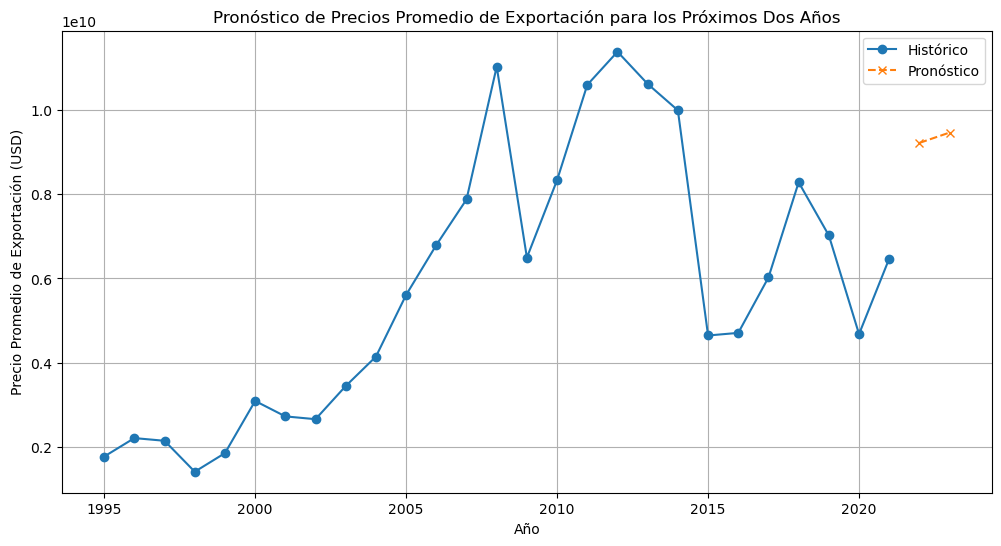

(245666013.3330874, -487519297430.9312)

In [19]:
# Visualización
# Creando una nueva figura para graficar con un tamaño especificado
plt.figure(figsize=(12, 6))

# Graficando los datos históricos de exportación. Seleccionando 'Año' y 'Valor del Comercio' 
# de 'plot_exports_data' donde 'Tipo' es 'Histórico', y usando círculos como marcadores
plt.plot(plot_exports_data[plot_exports_data['Type'] == 'Historical']['Year'], 
         plot_exports_data[plot_exports_data['Type'] == 'Historical']['Trade Value'], label='Histórico', marker='o')

# Graficando los datos pronosticados de exportación. Seleccionando 'Año' y 'Valor del Comercio' de
# 'plot_exports_data' donde 'Tipo' es 'Pronóstico', usando 'x' como marcadores y líneas punteadas para el estilo
plt.plot(plot_exports_data[plot_exports_data['Type'] == 'Forecast']['Year'], 
         plot_exports_data[plot_exports_data['Type'] == 'Forecast']['Trade Value'], 
         label='Pronóstico', marker='x', linestyle='--')

# Estableciendo el título de la gráfica y etiquetando los ejes
plt.title('Pronóstico de Precios Promedio de Exportación para los Próximos Dos Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio de Exportación (USD)')
# Añadiendo una leyenda a la gráfica y mostrando una cuadrícula para una mejor legibilidad
plt.legend()
plt.grid(True)
# Mostrando la gráfica
plt.show()

# Coeficientes del modelo
# Extrayendo la pendiente y la intersección del modelo de regresión lineal para exportaciones
lin_reg_exports_slope, lin_reg_exports_intercept = lin_reg_exports.coef_[0], lin_reg_exports.intercept_
# Mostrando la pendiente y la intersección del modelo
lin_reg_exports_slope, lin_reg_exports_intercept

In [67]:
# Segregación y Agregación de Datos

# Filtrando datos de exportación para las Américas
# Seleccionando filas de 'exports_data' donde 'Continente' es 'Norteamérica'
americas_export_data = exports_data[exports_data['Continent'] == 'North America']

# Filtrando aún más para obtener datos específicamente de los Estados Unidos
us_export_data = americas_export_data[americas_export_data['Country'] == 'United States']

# Obteniendo datos para el resto de las Américas excluyendo a los Estados Unidos
rest_of_americas_export_data = americas_export_data[americas_export_data['Country'] != 'United States']

# Calculando el total de exportaciones
# Sumando el 'Valor del Comercio' para Estados Unidos
total_us_exports = us_export_data['Trade Value'].sum()

# Sumando el 'Valor del Comercio' para el resto de las Américas
total_rest_of_americas_exports = rest_of_americas_export_data['Trade Value'].sum()

# Calculando la diferencia
# Calculando la diferencia en el valor total del comercio entre Estados Unidos y el resto de las Américas
difference_in_exports = total_us_exports - total_rest_of_americas_exports

# Creando una tabla resumen
# Compilando los valores calculados en un DataFrame resumen para una presentación clara
summary_table = pd.DataFrame({
    'Entidad': ['United States', 'Rest of America', 'Difference (US - Rest)'],
    'Total Exportaciones (USD)': [total_us_exports, total_rest_of_americas_exports, difference_in_exports]
})

# Mostrando la tabla resumen
summary_table

,Entidad,Total Exportaciones (USD)
0,United States,3.047174e+11
1,Rest of America,1.782722e+12
2,Difference (US - Rest),-1.478005e+12
